(10000, 1001)
(10000, 1001)
(10000, 1001)
population len: 1001


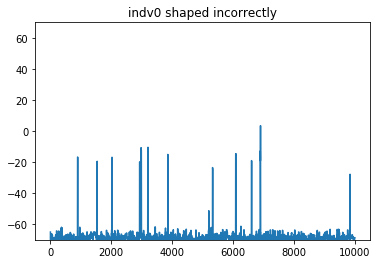

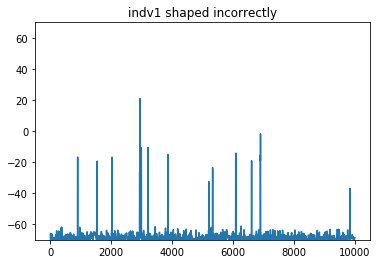

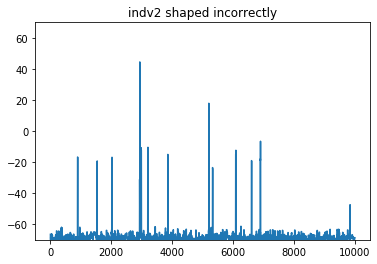

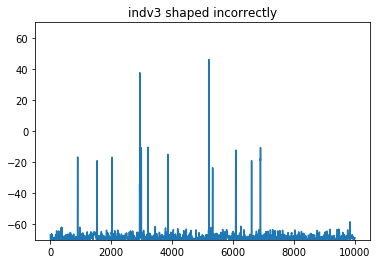

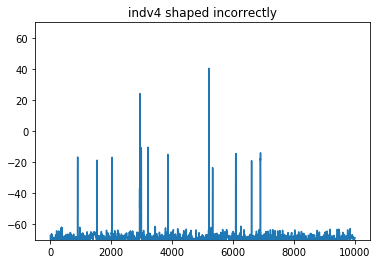

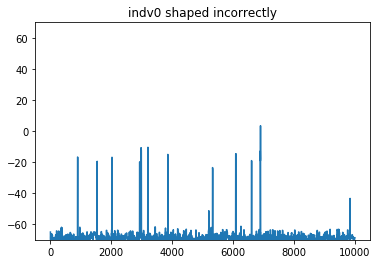

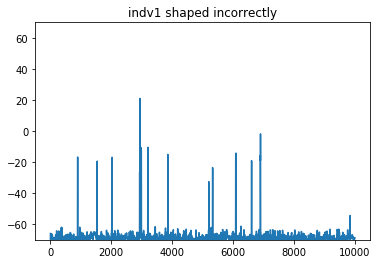

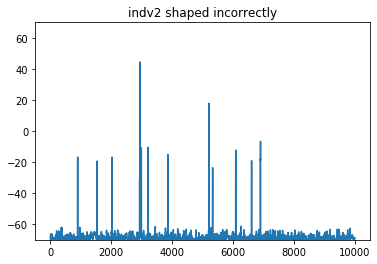

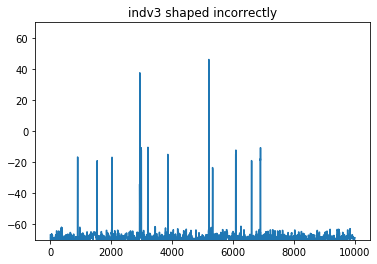

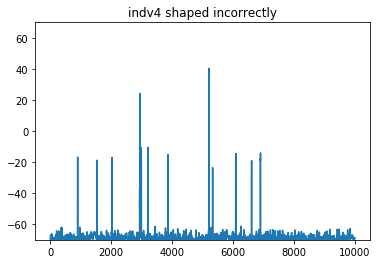

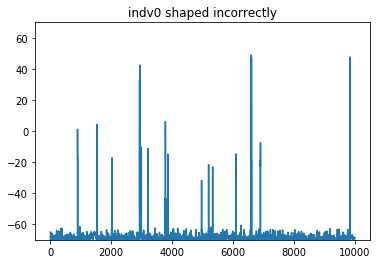

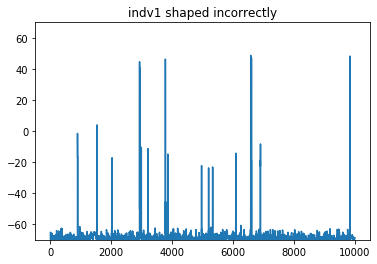

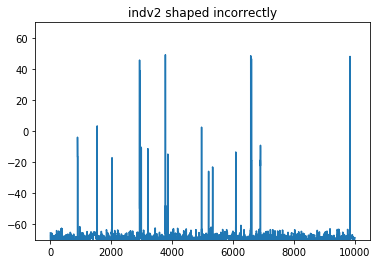

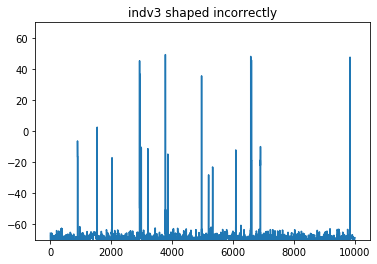

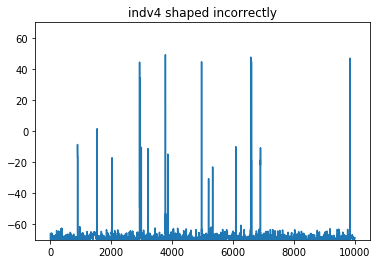

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import struct

def nrnMread(fileName):
    f = open(fileName, "rb")
    nparam = struct.unpack('i', f.read(4))[0]
    typeFlg = struct.unpack('i', f.read(4))[0]
    return np.fromfile(f,np.double)

data_dir ='../Data'

for i in range(4,7): #Nstims
    curr_volts = nrnMread(data_dir + '/VHotP' + str(i)  + '.dat')
    curr_times = np.genfromtxt(data_dir + '/times' + str(i) + '.csv', delimiter =',')
    Nt = int(len(curr_volts)/len(curr_times))
    shaped_volts = np.reshape(curr_volts, [len(curr_times), Nt])
    print(shaped_volts.shape)
    times = shaped_volts.shape[0]
    
    for indv in range(0,5):
        plt.figure()
        plt.plot(np.arange(len(curr_times)),shaped_volts[:,indv])
        plt.title("indv" + str(indv) + " shaped incorrectly")
        plt.ylim(-70,70)

#plt.ylim(bottom=ymin) #ymin is your value
print("population len:" ,Nt)
plt.show()

(1001, 10000)
(1001, 10000)
(1001, 10000)
(1001, 10000)
(1001, 10000)
(1001, 10000)
(1001, 10000)
(1001, 10000)
population len: 1001


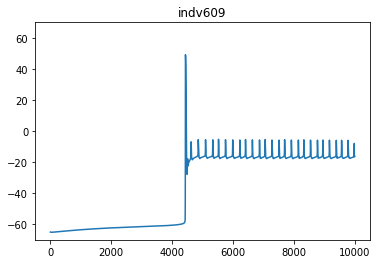

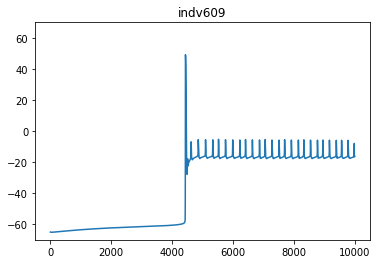

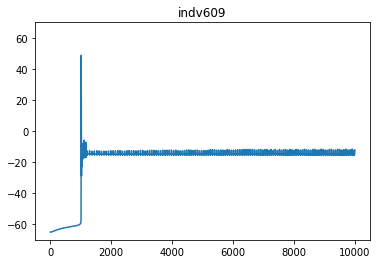

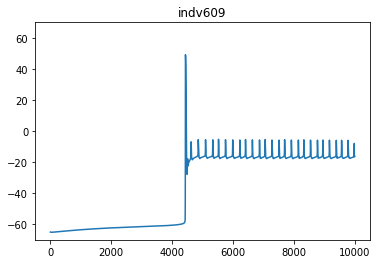

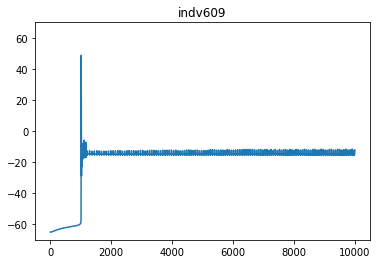

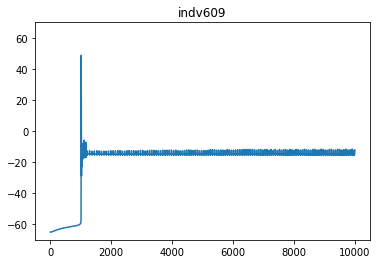

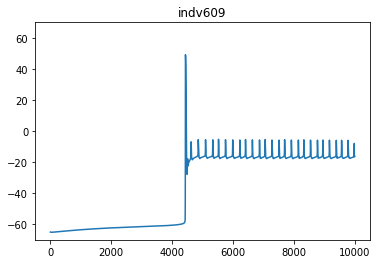

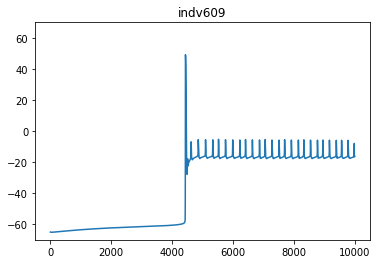

49.415950775146484


In [17]:
for i in range(0,8): #Nstims
    curr_volts = nrnMread(data_dir + '/VHotP' + str(i)  + '.dat')
    curr_times = np.genfromtxt(data_dir + '/times' + str(i) + '.csv', delimiter =',')
    Nt = int(len(curr_volts)/len(curr_times))
    shaped_volts = np.reshape(curr_volts, [Nt,len(curr_times)])
    print(shaped_volts.shape)
    times = shaped_volts.shape[0]
    
    for indv in range(609,610):
        plt.figure()
        plt.plot(np.arange(len(curr_times)),shaped_volts[indv,:])
        plt.title("indv" + str(indv))
        plt.ylim(-70,70)

#plt.ylim(bottom=ymin) #ymin is your value
print("population len:" ,Nt)
plt.show()
print(np.max(shaped_volts))

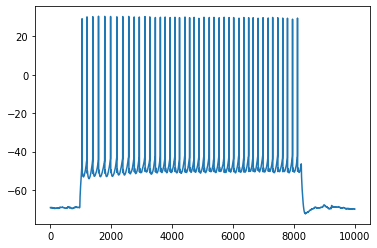

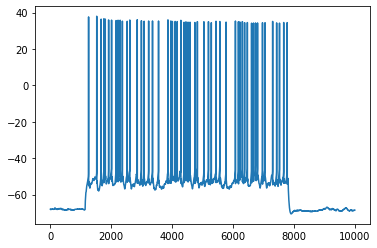

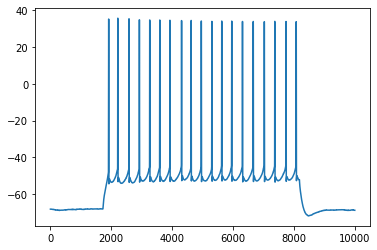

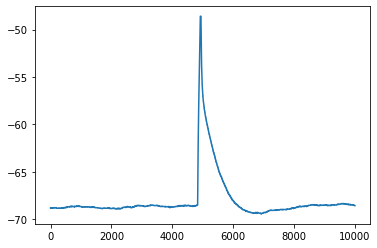

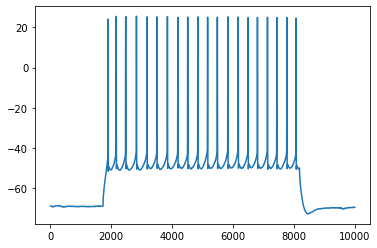

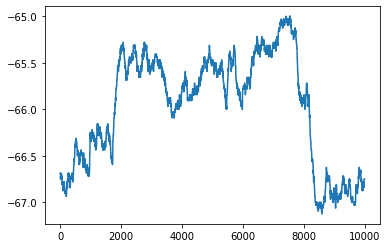

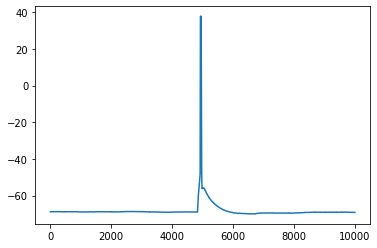

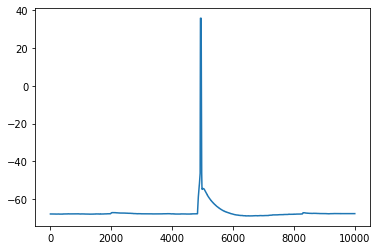

In [15]:
import h5py

run_volts_path = '../run_volts_bbp_full_gpu_tuned/'
paramsCSV = run_volts_path+'params/params_bbp_full_gpu_tuned_10_based.csv'
orig_params = h5py.File(run_volts_path+'params/params_bbp_full_allen_gpu_tune.hdf5', 'r')['orig_full'][0]
scores_path = '../scores/'
objectives_file = h5py.File('../python/objectives/multi_stim_bbp_full_allen_gpu_tune_18_stims.hdf5', 'r')
opt_weight_list = objectives_file['opt_weight_list'][:]
opt_stim_name_list = objectives_file['opt_stim_name_list'][:]
score_function_ordered_list = objectives_file['ordered_score_function_list'][:]
stims_path = run_volts_path+'/stims/allen_data_stims_10000.hdf5'
target_volts_path = '../python/target_volts/allen_data_target_volts_10000.hdf5'
target_volts_hdf5 = h5py.File(target_volts_path, 'r')
opt_stim_list = [e.decode('ascii') for e in opt_stim_name_list]
target_volts_list = np.array([target_volts_hdf5[s][:] for s in opt_stim_name_list])

for i in range(8,16):
    plt.figure()
    plt.plot(target_volts_list[i,:])

In [12]:
for i in range(1000):
    if max(shaped_volts[i,:]) > 20:
        print(i)

36
89
153
202
293
298
320
344
378
386
404
497
520
533
609
626
658
661
690
985
